In [ ]:
%run ../code/init_mooc_nb.ipy

from scipy import linalg as la
import operator
import scipy
from matplotlib import cm

sigma0 = np.array([[1., 0.], [0., 1.]])
sigmax = np.array([[0., 1.], [1., 0.]])
sigmay = np.array([[0., -1j], [1j, 0.]])
sigmaz = np.array([[1., 0.], [0., -1.]])

# dispersion functions
def plot_2D(X,Y,Z, ax_in=None):
    if ax_in==None:
        fig = plt.figure(figsize=(7,5))
        ax = fig.add_subplot(111, projection='3d')
    else:
        ax = ax_in

    vmin = np.array(Z).min()
    vmax = np.array(Z).max()
    
    if len(np.shape(Z)) > 2:
        for z in Z:
            ax.plot_surface(X, Y, z, rstride=1, cstride=1, cmap=cm.RdBu_r, linewidth=0.1, vmin=vmin, vmax=vmax)
    else:
        ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.RdBu_r, linewidth=0.1, vmin=vmin, vmax=vmax)

    if ax_in==None:
        return fig, ax
    else:
        return ax 
    

def evaluate_on_grid(X, Y, func):
    """ X, Y should be in np.meshgrid form. It's enough for func to work on floats. """
    data = []
    for xx, yy in zip(X, Y):
        row = []
        for i,j in zip(xx, yy):
            row.append(func(i,j))
        data.append(row)
    data = np.array(data)
    temp = np.shape(data)[2]
    data = [np.array(data[:,:,i]) for i in [temp/2-1, temp/2]]#range(np.shape(data)[2])]#range(1)]# 
    return data


def diagonalize(sys, par):
    mat = sys.hamiltonian_submatrix(args=[par])
    ev, evec = scipy.linalg.eigh(mat)  # Automatically sorted
    return ev, evec


def dispersion_func(sys, par):
    def func(kx, ky):
        par.kx = kx
        par.ky = ky
        return diagonalize(sys, par)[0]
    return func

Performing the necessary imports.

from __future__ import division, print_function
import numpy as np
import matplotlib
import kwant

import ipywidgets
from IPython.html.widgets import interact
from ipywidgets import StaticInteract, RangeWidget, DropDownWidget
from IPython.display import display_html
from matplotlib import pyplot as plt

import pfaffian as pf
from edx_components import *



Press this button to show/hide the code used in the notebook:

#Table of Contents
* [Introduction](#Introduction)
* [The role of crystalline symmetries](#The-role-of-crystalline-symmetries)
* [Reflection symmetry](#Reflection-symmetry)
* [Examples](#Examples)
* [Experimental realization of a 3D crystalline topological insulator](#Experimental-realization-of-a-3D-crystalline-topological-insulator)
* [Conclusions](#Conclusions)


**No content above this line is visible in edX**

# Introduction

Crystalline topological insulators are introduced by Liang Fu from MIT.

In [ ]:
MoocVideo("N9-tUYjXC1s", src_location="11.2-intro")

MoocVideo(**{'download_video': 'true', 'display_name': '', 'sub': 'N9-tUYjXC1s', 'youtube': '1.00:N9-tUYjXC1s', 'show_captions': 'true', 'youtube_id_1_0': 'N9-tUYjXC1s', 'source': 'http://delftxdownloads.tudelft.nl/TOPOCMx-QuantumKnots/TOPOCMx-11.2-intro-video.720.mp4', 'download_track': 'true'})

# The role of crystalline symmetries

In the very beginning of the course, we told you that conservation laws - unitary symmetries of the Hamiltonian - do not lead to striking consequences on topology. They allow to reduce the problem by making the Hamiltonian block-diagonal, but not much else (see also Shinsei Ryu's introductory video to week eight).

At first sight, it may seem that crystalline symmetries: mirror or reflection symmetries, rotation symmetries, and so on - are no exception to the above consideration. They are unitary symmetries whose operators commute with the Hamiltonian. 

Nevertheless, the role of crystalline symmetries can be quite subtle and it can have important . The reason is that crystalline symmetries are non-local. They relate one point in a crystal to another point, possibly a very distant point. This means that in terms of the Bloch Hamiltonian of the crystal, these symmetries mix different values of momentum.

Consider for instance a 2D crystal with a reflection symmetry $\mathcal{R}: (x, y) \to (-x, y)$ around the $x=0$ axis. In momentum space, this symmetry will read $RH(k_x, k_y)R^\dagger = H(-k_x, k_y)$, with a certain unitary operator $R$.

Due to this type of constraint on the Brillouin zone, crystalline symmetries can have important consequences on the topological properties of Bloch Hamiltonians.

Note however, that sometimes the mere presence of a surface can break a crystalline symmetry of the bulk, so that one should be careful when applying the bulk-boundary correspondence to properties based on crystalline symmetries.

In [ ]:
question = (r"In which case can inversion symmetry protect gapless surface states?")

answers = ["Never.",
           "In the case of 2D TIs with inversion symmetry.",
           "Only in three dimensions.",
           "Only in combination with particle-hole or time-reversal symmetry. "]

explanation = "Any surface would break inversion symmetry of a crystal."

MoocMultipleChoiceAssessment(question, answers, correct_answer=0, explanation=explanation)

MoocMultipleChoiceAssessment(**{'display_name': 'Question', 'correct_answer': 0, 'explanation': 'Any surface would break inversion symmetry of a crystal.', 'question': 'In which case can inversion symmetry protect gapless surface states?', 'answers': ['Never.', 'In the case of 2D TIs with inversion symmetry.', 'Only in three dimensions.', 'Only in combination with particle-hole or time-reversal symmetry. '], 'max_attempts': 2})

# Reflection symmetry

The second-simplest crystalline symmetry (after translation symmetry of course) occurring in many materials is reflection (or mirror) symmetry around one spatial coordinate. For instance, in a 3D crystal, reflection symmetry around the $z$ axis transforms the wave-wector as

$$
(k_x, k_y, k_z)\rightarrow (k_x, k_y, -k_z).
$$

Reflection symmetry also applies a 180 degree rotation about the $z$-axis to the electron spin, so $\psi_{\uparrow}\rightarrow -i \psi_{\uparrow}$ and $\psi_{\downarrow}\rightarrow i \psi_{\downarrow}$, so that the operator squares to $-1$ when acting on a spin.

Next if we consider the application of reflection symmetry to either a two-dimensional material or plane in a three dimensional material, then we can choose $k_z=0$ and the reflection symmetry just becomes a regular unitary symmetry i.e. the $C_2$ rotation.

In this case, the topological classification follows rather simply from our earlier discussion. $C_2$ is a unitary symmetry with eigenvalues $\pm i$. We can split our Hamiltonian into the corresponding two sector $H_{\pm}$ acting on the $C_2=\pm i$ sectors respectively. Each of the Hamiltonians $H_{\pm}$ are 2 dimensional Hamiltonians in class A (i.e. with no symmetry) and therefore we can associate a Chern number $N_{\pm}$ with each of them. 

>If the Hamiltonian overall is trivial then the total Chern number $N_++N_-=0$ so we can classify the 2 dimensional mirror symmetric Hamiltonians by a **mirror Chern number** $N_M=N_+-N_-$.

The mirror Chern number is a topological invariant in the sense that it cannot change without a closure of the bulk gap provided the reflection symmetry is held intact. Moreover the reflection symmetry, together with non-trivial values of the invariant will guarantee edge states.

Naturally, the same recipe allows to construct a reflection symmetric topological insulator starting from any other topological invariant, not just a Chern number. We will now try to do this.

In [ ]:
question = ("How would you attempt to make a model of a topological"
            " insulator with surface states protected by reflection symmetry?")

answers = ["By using the interface of a material with reflection symmetry, and that of one without it.",
           "By stacking many layers of a lower dimensional topological insulator, "
           "and coupling them in a reflection-symmetric fashion.",
           "Reflection symmetry alone cannot protect any gapless surface state.",
           "By making a narrow ribbon of the material where only the momentum orthogonal to the reflection axis can be non-zero."]

explanation = ("Such a stack would have a reflection symmetry around any of the layers, "
               "which is not broken by the presence of a surface parallel to the stacking direction.")

MoocMultipleChoiceAssessment(question, answers, correct_answer=1, explanation=explanation)

MoocMultipleChoiceAssessment(**{'display_name': 'Question', 'correct_answer': 1, 'explanation': 'Such a stack would have a reflection symmetry around any of the layers, which is not broken by the presence of a surface parallel to the stacking direction.', 'question': 'How would you propose to make a topological insulator with surface states protected by reflection symmetry?', 'answers': ['By using the interface of a material with reflection symmetry, and that of one without it.', 'By stacking many layers of a lower dimensional topological insulator, and coupling them in a reflection-symmetric fashion.', 'Reflection symmetry alone cannot protect any gapless surface state.', 'By making a narrow ribbon of the material where only the momentum orthogonal to the reflection axis can be non-zero.'], 'max_attempts': 2})

# Examples

Let's think, what could be the simplest topological system protected by reflection symmetry.

We need $d=2$, since the only possible reflection symmetry is broken by the boundary in $d=1$, and we can once again consider coupled Majorana nanowires.

We can put two nanowires in a unit cell of the lattice and make their parameters different. That way the weak topological invariant is trivial (there is an even number of Majoranas per unit cell).

On the other hand, if the hopping between the nanowires is reflection invariant, there will be a reflection symmetry axis passing through each nanowire, like this:

![](figures/reflection.png)

If we do everything right (this does require some trial and error in searching for the hopping that actually can couple the two Majoranas from the edge), we get a painfully familiar dispersion:

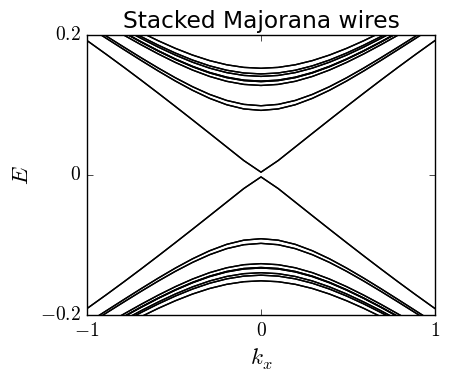

In [ ]:
def nanowire_chains(length=20, n=2):
    def onsite(site, par):
        (x, y) = site.pos
        return ((2*par.t - par.mu) * np.kron(sigmaz, sigma0) + par.delta * np.kron(sigmax, sigma0)
                + (y%2==0) * par.B * np.kron(sigma0, sigmaz) + (y%2==1) * par.B * np.kron(sigma0, sigmay))

    def hopy(site1, site2, par):
        return -par.t * np.kron(sigmaz, sigma0) + 0.5 * 1j * par.alpha * np.kron(sigmaz, sigmax)
    
    def hopx(site1, site2, par):
        (x1, y1) = site1.pos
        (x2, y2) = site2.pos
        return 1j * (-1)**((x1 + x2 - 1)%2==0) * par.tx * np.kron(sigmay, sigmax)
    
    def shape(pos):
        (x, y) = pos
        return (0 <= y < length) * (0 <= x < n)
        
    lat = kwant.lattice.square()
    sym = kwant.TranslationalSymmetry((n, 0))
    sys = kwant.Builder(sym)    
    
    sys[lat.shape(shape, (0, 0))] = onsite
    sys[kwant.HoppingKind((0, 1), lat)] = hopy
    sys[kwant.HoppingKind((1, 0), lat)] = hopx
    
    return sys.finalized()


par = SimpleNamespace(t=1.0, tx=0.2, mu=0., B=0.4, delta=0.15, alpha=0.3, kx=0.0, ky=0.0)
sys1 = nanowire_chains(length=40)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_color_cycle(['k'])
kwant.plotter.bands(sys1, args=[par,], show=False, ax=ax)
ax.set_ylim([-0.2, 0.2])
ax.set_yticks([-0.2, 0, 0.2])
ax.set_yticklabels(['$-0.2$', '$0$', '$0.2$'])
ax.set_ylabel('$E$')
ax.set_xlim([-1, 1])
ax.set_xticks([-1, 0, 1])
ax.set_xticklabels(['$-1$', '$0$', '$1$'])
ax.set_xlabel('$k_x$')
ax.set_title('Stacked Majorana wires')
plt.show()

The same way we can also construct a tight-binding model with a mirror Chern number. The only difference with the Majorana wires that we need to worry about is that Chern number is a $\mathbb{Z}$ invariant instead of $\mathbb{Z}_2$.

This means that the Chern number of the alternating layers has to have opposite signs, or otherwise the surface would just have surface states going in a single direction.

Once again, coupling the layers we get a familiar Dirac cone on the surface:

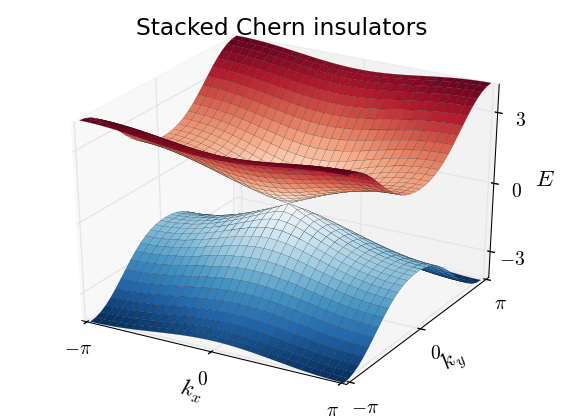

In [ ]:
def stacked_qwz(w=50):
    #x is stacking direction
    #y open
    #z closed
    def shape(pos):
        (x, z) = pos
        return (0 <= x < 2) * (0 <= z < w)
               
    def hopx(site1, site2, par):
        return - 1j * par.tx * (1 - np.exp(1j * par.kx)) * sigmay
    
    def hopy(site1, site2, par):
        (x, z) = site1.pos
        A, B, D, M = par.A/2, par.B, par.D, par.M
        return B * sigmaz + D * sigma0 + 1j * A * sigmax

    def hopz(site1, site2, par):
        (x, z) = site1.pos
        A, B, D, M = par.A/2, par.B, par.D, par.M
        return B * sigmaz + D * sigma0 - (-1)**z * 1j * A * sigmay
    
    def onsite(site, par):
        (x, z) = site.pos
        A, B, D, M = par.A/2, par.B, par.D, par.M
        return ((M - 4 * B) * sigmaz - 4 * D * sigma0
                + np.exp(1j * par.ky) * hopy(site, site, par) + np.exp(-1j * par.ky) * hopy(site, site, par).T.conjugate())
    
    lat = kwant.lattice.square()
    sys = kwant.Builder()  
    
    sys[lat.shape(shape, (0, 0))] = onsite
    sys[kwant.HoppingKind((1, 0), lat)] = hopx
    sys[kwant.HoppingKind((0, 1), lat)] = hopz
    
    return sys.finalized()


par = SimpleNamespace(A=1.0, B=1.0, D=0.0, M=0.3, tx=1.0)
sys = stacked_qwz(30)

kx = np.linspace(-np.pi, np.pi, 31)
ky = np.linspace(-np.pi, np.pi, 31)
mesh = np.meshgrid(kx, ky)
energies = evaluate_on_grid(*mesh, func=dispersion_func(sys, par))

fig, ax = plot_2D(*mesh, Z=energies)
ax.set_xlabel('$k_x$')
ax.set_ylabel('$k_y$')
ax.set_zlabel('$E$')
ax.set_xlim(-np.pi, np.pi)
ax.set_ylim(-np.pi, np.pi)
ax.set_zlim3d(-4, 4)
ax.set_xticks([-np.pi, 0, np.pi])
ax.set_yticks([-np.pi, 0, np.pi])
ax.set_zticks([-3, 0, 3])
ax.set_xticklabels([r'$-\pi$', '$0$', r'$\pi$'])
ax.set_yticklabels([r'$-\pi$', '$0$', r'$\pi$'])
ax.set_zticklabels(['$-3$', '$0$', '$3$'])
ax.set_title('Stacked Chern insulators');

Of course also now the dispersion of the edge states looks exactly like what we saw already because all the edge state dispersion in any topological insulator is just given by the Dirac equation.

# Experimental realization of a 3D crystalline topological insulator

As mentioned by Liang Fu, three dimensional crystalline topological insulators have been both predicted and also found in nature. The magical material, which is topological turns out to be a material SnTe, which is actually a "rock-salt" structure. We won't bore you with the details of the rock-salt structure, which you can find for yourself on [Wikipedia](https://en.wikipedia.org/wiki/Cubic_crystal_system#Rock-salt_structure). 

We will just start with the key ingredients for the crystalline topological insulator, namely the symmetries of the crystal: the spatial inversion $P$, time-reversal symmetry $\Theta$ and most importantly the three mirror planes in the cubic Brillouin zone. The three mirror planes $\Gamma L_1 L_2$, $\Gamma L_3 L_4$ and $\Gamma L_3 L_1$ in the Brillouin zone are reflection-symmetric directions that are created out of four time-reversal invariant momenta $\Gamma, L_1, L_2, L_3, L_4$. 

While the reflection symmetry acts non-trivially on general wave-vectors $\bf k$, the symmetry preserves the mirror planes in the Brillouin zone. Following the idea of dimensional reduction that we used for three dimensional topological insulators (week 6) and also in subsequent weeks, we can define the topological invariant for the crystalline topological insulator in terms of the three mirror Chern numbers for the three mirror planes. For SnTe, all these mirror Chern numbers turn out to be $N_{M}(\Gamma L_i L_j)=-2$. This topological invariant leads to surface Dirac cones on certain surfaces as seen below.

![](figures/SnTefig.png)

Figure copyright of the Zahid Hasan lab, Princeton, 2015, available under CC-BY-NC-SA 4.0 International license.

This surface spectrum is very easy to interpret.

The crystal curface you see here is perpendicular to two mirror planes projected on $\bar{\Gamma}\bar{X}$ axes. Since the mirror Chern number with respect to each of these planes is $-2$, there is a pair of Dirac cones near each $X$-point protected by a respective mirror symmetry.

The reflection symmetry pins the pairs Dirac cones to the mirror planes, while time reversal symmetry requires that their momenta are opposite. The 90 degree rotation symmetry interchanges the pairs of cones.

# Conclusion

In short, crystalline topological insulators combine the variety of topological phases with the variety of the crystalline symmetry groups, leading to a multitude of new opportunities.

Questions about what you just learned? Ask them below!

In [ ]:
MoocDiscussion("Questions", "Crystalline TI")

MoocDiscussion(**{'discussion_category': 'Questions', 'discussion_target': 'Crystalline TI', 'display_name': 'Crystalline TI', 'discussion_id': 'b533ee3b82a195b4e851d69146c410a7'})